In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib as mpl

In [5]:
#import data from Github
data =pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter02/Exercise2.01/sales.csv')

In [6]:
#over view data
data.tail()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# list columns in data
print(data.columns)

Index(['Year', 'Product line', 'Product type', 'Product', 'Order method type',
       'Retailer country', 'Revenue', 'Planned revenue', 'Product cost',
       'Quantity', 'Unit cost', 'Unit price', 'Gross profit',
       'Unit sale price'],
      dtype='object')


In [39]:
# need to analyse data by country
pl = data.groupby('Retailer country')['Planned revenue'].sum().reset_index() #planned Revenue
Rv = data.groupby('Retailer country')['Revenue'].sum().reset_index()# reveneu
cPr =data.groupby('Retailer country')['Gross profit'].sum().reset_index()# Gross profit

In [44]:
pl.head(2)

,Retailer country,Planned revenue
0,Australia,15528551.26
1,Austria,16639182.90


<ipython-input-94-97c40ff94816>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(pl["Retailer country"].unique().astype(str), rotation='vertical')
<ipython-input-94-97c40ff94816>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(Rv["Retailer country"].unique().astype(str), rotation='vertical')
<ipython-input-94-97c40ff94816>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(cPr["Retailer country"].unique().astype(str), rotation='vertical')


[Text(0, 0, 'Australia'),
 Text(1, 0, 'Austria'),
 Text(2, 0, 'Belgium'),
 Text(3, 0, 'Brazil'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'China'),
 Text(6, 0, 'Denmark'),
 Text(7, 0, 'Finland'),
 Text(8, 0, 'France'),
 Text(9, 0, 'Germany'),
 Text(10, 0, 'Italy'),
 Text(11, 0, 'Japan'),
 Text(12, 0, 'Korea'),
 Text(13, 0, 'Mexico'),
 Text(14, 0, 'Netherlands'),
 Text(15, 0, 'Singapore'),
 Text(16, 0, 'Spain'),
 Text(17, 0, 'Sweden'),
 Text(18, 0, 'Switzerland'),
 Text(19, 0, 'United Kingdom'),
 Text(20, 0, 'United States')]

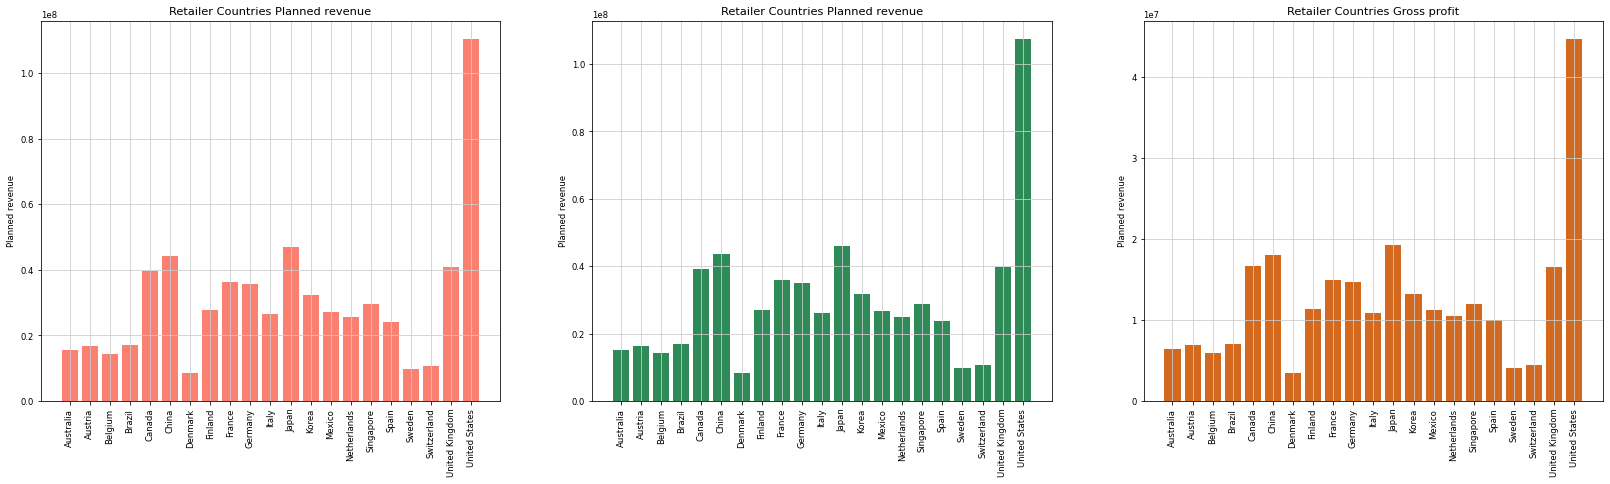

In [94]:
fig, ax=plt.subplots(1,3, figsize=(28,7))
ax[0].bar(pl['Retailer country'],pl['Planned revenue'],color='salmon')
ax[1].bar(Rv['Retailer country'],Rv['Revenue'], color='seagreen')
ax[2].bar(cPr['Retailer country'],cPr['Gross profit'], color='chocolate')


#formating label Charts
lebel_format = ':,0f'
mpl.rcParams['font.size']=9.5
mpl.rcParams['font.family']='sans-serif'



ax[0].set_title('Retailer Countries Planned revenue')
ax[0].grid(color='#cccccc')
ax[0].set_ylabel('Planned revenue')
ax[0].set_xlabel(None)
ax[0].set_xticklabels(pl["Retailer country"].unique().astype(str), rotation='vertical')



ax[1].set_title('Retailer Countries Planned revenue')
ax[1].grid(color='#cccccc')
ax[1].set_ylabel('Planned revenue')
ax[1].set_xlabel(None)
ax[1].set_xticklabels(Rv["Retailer country"].unique().astype(str), rotation='vertical')


ax[2].set_title('Retailer Countries Gross profit')
ax[2].grid(color='#cccccc')
ax[2].set_ylabel('Planned revenue')
ax[2].set_xlabel(None)
ax[2].set_xticklabels(cPr["Retailer country"].unique().astype(str), rotation='vertical')

In [95]:
# how many Product line is available in thic company
data['Product line'].unique()

array(['Golf Equipment', 'Camping Equipment', 'Outdoor Protection',
       'Mountaineering Equipment'], dtype=object)

In [115]:
#how is many product type per product line
Golf=data[data['Product line']=='Golf Equipment']
Camp =data[data['Product line']=='Camping Equipment']
Outd =data[data['Product line']=='Outdoor Protection']
Mount =data[data['Product line']=='Mountaineering Equipment']

print('List of Product type in each Product line is :\n')
print('Golf Equipment : '+ str(Golf['Product type'].unique().tolist()) + '\n')
print('Camping Equipment : '+ str(Camp['Product type'].unique().tolist()) + '\n')
print('Outdoor Protection : '+ str(Outd['Product type'].unique().tolist()) + '\n')
print('Mountaineering Equipment : '+ str(Mount['Product type'].unique().tolist()) + '\n')

List of Product type in each Product line is :

Golf Equipment : ['Golf Accessories']

Camping Equipment : ['Sleeping Bags', 'Cooking Gear']

Outdoor Protection : ['First Aid', 'Insect Repellents']

Mountaineering Equipment : ['Climbing Accessories']



In [116]:
#How many equipment sold per product line
data.groupby('Product line')['Quantity'].sum()

Product line
Camping Equipment           15200145.0
Golf Equipment               2367637.0
Mountaineering Equipment     3672582.0
Outdoor Protection           6250499.0
Name: Quantity, dtype: float64

In [118]:
#which Product type sold more quantity
data.groupby('Product type')['Quantity'].sum()

Product type
Climbing Accessories     3672582.0
Cooking Gear            13390271.0
First Aid                 770426.0
Golf Accessories         2367637.0
Insect Repellents        5480073.0
Sleeping Bags            1809874.0
Name: Quantity, dtype: float64

In [125]:
#which Product sold more quantity
product_q =data.groupby('Product')['Quantity'].sum().reset_index()
product_prev = data.groupby('Product')['Planned revenue'].sum().reset_index()
product_rev = data.groupby('Product')['Revenue'].sum().reset_index()
product_grp = data.groupby('Product')['Gross profit'].sum().reset_index()

In [133]:
q_p=pd.merge(product_q,product_prev, how='right')
q_rev=pd.merge(q_p,product_rev, how='right')
pr_df=pd.merge(q_rev,product_grp, how='right')
pr_df.head()

,Product,Quantity,Planned revenue,Revenue,Gross profit
0,Aloe Relief,149636.0,764453.06,736065.92,430621.58
1,BugShield Extreme,2520946.0,17281699.26,16967583.01,10501970.95
2,BugShield Lotion,730198.0,5060069.84,4996440.47,3243762.97
3,BugShield Lotion Lite,357900.0,2477506.71,2487511.81,1786866.52
4,BugShield Natural,1160714.0,6850430.70,6795330.84,4522549.50


#### question number 1, Does quantinty influnce total gross Profit?

In [147]:
pr_df.sort_values('Quantity', ascending= False).head(10)

,Product,Quantity,Planned revenue,Revenue,Gross profit
37,TrailChef Water Bag,4308828.0,24771369.30,26680948.68,11765136.08
1,BugShield Extreme,2520946.0,17281699.26,16967583.01,10501970.95
33,TrailChef Kettle,2336950.0,29415601.90,26847373.16,13994981.90
17,Granite Carabiner,1944363.0,7674370.36,7492297.32,3578264.20
30,TrailChef Cup,1812123.0,6407674.53,5927198.35,4157413.39
4,BugShield Natural,1160714.0,6850430.70,6795330.84,4522549.50
28,TrailChef Canteen,965723.0,12208721.84,11686719.04,4725613.87
36,TrailChef Utensils,922090.0,17340251.05,16404940.78,7346612.23
34,TrailChef Kitchen Kit,866669.0,19869383.58,20293164.45,5927386.83
15,Firefly Rechargeable Battery,849827.0,6612478.96,6710865.52,3847773.43


In [150]:
#calcluate total gross profiit
Total_gross =pr_df['Gross profit'].sum() 
print(Total_gross)

262123491.39999998


In [152]:
#find share of Gross proffit for each item
pr_df['Profit_share']= pr_df['Gross profit']/Total_gross
pr_df.sort_values('Profit_share', ascending=False)

,Product,Quantity,Planned revenue,Revenue,Gross profit,Profit_share
22,Hibernator Extreme,251092.0,65358292.52,63973419.49,25093379.13,0.095731
26,Hibernator Self - Inflating Mat,7215.0,40143503.40,36385727.32,18192996.57,0.069406
31,TrailChef Deluxe Cook Set,432056.0,57353881.92,53195154.45,17667348.61,0.067401
32,TrailChef Double Flame,245559.0,35210057.37,36369606.90,15894249.84,0.060636
33,TrailChef Kettle,2336950.0,29415601.90,26847373.16,13994981.90,0.053391
29,TrailChef Cook Set,813780.0,42239329.69,43645880.61,12878820.69,0.049133
23,Hibernator Lite,501837.0,44412077.85,43350668.57,12442031.09,0.047466
37,TrailChef Water Bag,4308828.0,24771369.30,26680948.68,11765136.08,0.044884
35,TrailChef Single Flame,686493.0,44078730.11,44948227.06,11350274.22,0.043301
9,Course Pro Golf Bag,82872.0,18310234.20,17163578.76,10509106.96,0.040092


In [154]:
#type of sales_type
data['Order method type'].unique()

array(['Sales visit', 'Telephone', 'Web', 'Special', 'Mail', 'E-mail',
       'Fax'], dtype=object)

In [164]:
#whic products assciated with certian type of sales
pro_sales=data.groupby(['Product','Order method type'])['Quantity'].sum().reset_index()

In [176]:
pro_sales.head()

,Product,Order method type,Quantity
0,Aloe Relief,E-mail,11328.0
1,Aloe Relief,Fax,3641.0
2,Aloe Relief,Mail,3230.0
3,Aloe Relief,Sales visit,23709.0
4,Aloe Relief,Special,2849.0


In [168]:
pro_sales_df=pro_sales.pivot(index='Product', columns='Order method type', values='Quantity').reset_index()

In [170]:
pro_sales_df.head()

Order method type,Product,E-mail,Fax,Mail,Sales visit,Special,Telephone,Web
0,Aloe Relief,11328.0,3641.0,3230.0,23709.0,2849.0,27855.0,77024.0
1,BugShield Extreme,143491.0,99708.0,88557.0,406381.0,52936.0,316158.0,1413715.0
2,BugShield Lotion,90473.0,14383.0,23105.0,67889.0,4442.0,155480.0,374426.0
3,BugShield Lotion Lite,44430.0,5912.0,10106.0,50186.0,629.0,75473.0,171164.0
4,BugShield Natural,60378.0,36399.0,32528.0,197821.0,32508.0,166228.0,634852.0


In [200]:
full_pr_df=pd.merge(pro_sales_df,pr_df).set_index('Product')

In [201]:
#ten most proiftable 
full_pr_df.sort_values('Gross profit', ascending=False).head(10)

,E-mail,Fax,Mail,Sales visit,Special,Telephone,Web,Quantity,Planned revenue,Revenue,Gross profit,Profit_share
Product,,,,,,,,,,,,
Hibernator Extreme,9734.0,10130.0,3714.0,36817.0,4313.0,26211.0,160173.0,251092.0,65358292.52,63973419.49,25093379.13,0.095731
Hibernator Self - Inflating Mat,0.0,0.0,0.0,7215.0,0.0,0.0,0.0,7215.0,40143503.40,36385727.32,18192996.57,0.069406
TrailChef Deluxe Cook Set,14683.0,7703.0,4759.0,44643.0,2771.0,36562.0,320935.0,432056.0,57353881.92,53195154.45,17667348.61,0.067401
TrailChef Double Flame,9692.0,4349.0,3103.0,23265.0,2529.0,23057.0,179564.0,245559.0,35210057.37,36369606.90,15894249.84,0.060636
TrailChef Kettle,144059.0,23130.0,26260.0,235511.0,15888.0,273793.0,1618309.0,2336950.0,29415601.90,26847373.16,13994981.90,0.053391
TrailChef Cook Set,40472.0,14625.0,11657.0,77805.0,5372.0,90122.0,573727.0,813780.0,42239329.69,43645880.61,12878820.69,0.049133
Hibernator Lite,32872.0,11074.0,6330.0,54005.0,5431.0,60800.0,331325.0,501837.0,44412077.85,43350668.57,12442031.09,0.047466
TrailChef Water Bag,177931.0,95580.0,58823.0,510230.0,53550.0,456263.0,2956451.0,4308828.0,24771369.30,26680948.68,11765136.08,0.044884
TrailChef Single Flame,29916.0,7607.0,10219.0,86315.0,10325.0,64484.0,477627.0,686493.0,44078730.11,44948227.06,11350274.22,0.043301


Text(0.5, 1.0, 'Number of Sales for Specifi products based on Order method type')

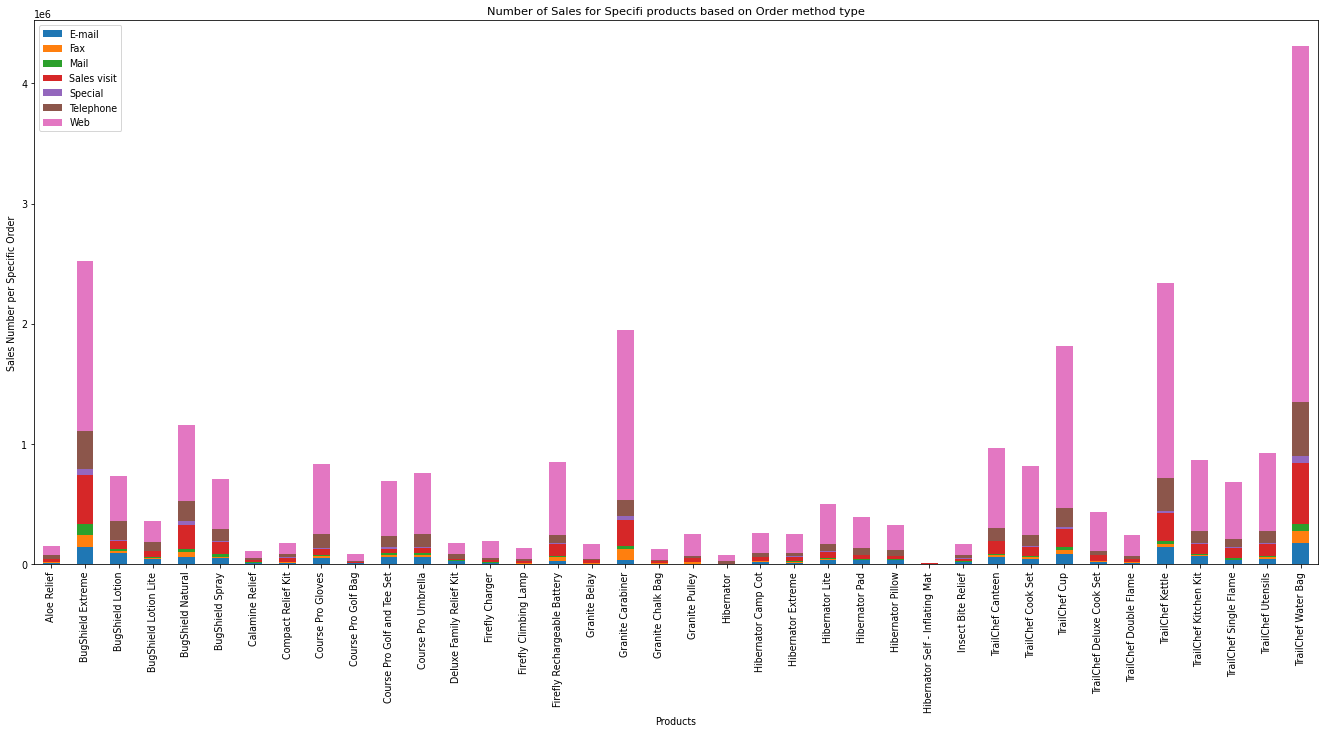

In [204]:
full_pr_df.iloc[:,:7].plot(kind='bar', stacked=True, figsize=(23,10))
plt.xlabel('Products')
plt.ylabel('Sales Number per Specific Order')
plt.title('Number of Sales for Specifi products based on Order method type')